In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import stat
import scipy

In [2]:
data = pd.read_csv(r'ab_data.csv')

In [3]:
data.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [5]:
print ( min(data['timestamp']) + ' to ' + max(data['timestamp']))

2017-01-02 13:42:05.378582 to 2017-01-24 13:41:54.460509


In [6]:
data['user_id'].nunique()

290584

In [7]:
data_dbuser = data[data.duplicated(subset='user_id' )]

In [8]:
data_dbuser

,user_id,timestamp,group,landing_page,converted
2656,698120,2017-01-15 17:13:42.602796,control,old_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0
7500,899953,2017-01-07 03:06:54.068237,control,new_page,0
8036,790934,2017-01-19 08:32:20.329057,treatment,new_page,0
10218,633793,2017-01-17 00:16:00.746561,treatment,old_page,0
...,...,...,...,...,...
294308,905197,2017-01-03 06:56:47.488231,treatment,new_page,0
294309,787083,2017-01-17 00:15:20.950723,control,old_page,0
294328,641570,2017-01-09 21:59:27.695711,control,old_page,0
294331,689637,2017-01-13 11:34:28.339532,control,new_page,0


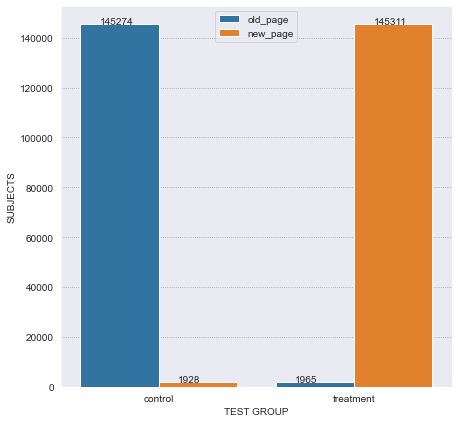

In [9]:
#plotting graph of number of subjects for each group and landing_page
sns.set_style('darkgrid' , {"grid.color": ".6", "grid.linestyle": ":", "axes.labelpad": "35"})
plt.figure(figsize=(7, 7))
#plt.margins(50)
_ = sns.countplot(x='group', hue='landing_page', data= data)
plt.xlabel('TEST GROUP')
plt.ylabel('SUBJECTS')
plt.legend( loc= 'upper center')
for p in _.patches:
        _.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.1, p.get_height()+50))

In [10]:
#filtering and grouping data
data_sel = data.drop(['user_id', 'timestamp'], axis=1)

In [11]:
data_grouped = data_sel.groupby(['group', 'landing_page']).sum('converted')

In [12]:
data_grouped

converted
group     landing_page           
control   new_page            234
          old_page          17489
treatment new_page          17264
          old_page            250

In [13]:
data_grouped['subjects'] = data_sel.groupby(['group', 'landing_page'])['converted'].count() 
data_grouped['non_converts'] = data_grouped['subjects'] -data_grouped['converted']

In [14]:
data_grouped


converted  subjects  non_converts
group     landing_page                                   
control   new_page            234      1928          1694
          old_page          17489    145274        127785
treatment new_page          17264    145311        128047
          old_page            250      1965          1715

In [15]:
rc_df = data_grouped[['converted', 'non_converts']]

In [16]:
rc_df

converted  non_converts
group     landing_page                         
control   new_page            234          1694
          old_page          17489        127785
treatment new_page          17264        128047
          old_page            250          1715

In [17]:
rc_df = pd.DataFrame.transpose(rc_df)

In [18]:
#rc_df = pd.DataFrame(rc_df, columns=cols,index=new_index)
rc_df.columns = [''.join(col) for col in rc_df.columns]
rc_df

,controlnew_page,controlold_page,treatmentnew_page,treatmentold_page
converted,234,17489,17264,250
non_converts,1694,127785,128047,1715


In [19]:
#chi-square test for independence
from scipy.stats import chi2_contingency 
# using Pearson’s chi-squared statistic
# corrected for the Yates’ continuity

chi_val, p_val, dof, expected =  chi2_contingency(rc_df)
chi_val, p_val, dof, expected

(2.852022946686609,
 0.4150074587155922,
 3,
 array([[   230.70292518,  17383.36968466,  17387.79707482,
            235.13031534],
        [  1697.29707482, 127890.63031534, 127923.20292518,
           1729.86968466]]))

In [20]:
p_val

0.4150074587155922

Inference
With a p_value of 41.5%, the null hypothesis cannot be rejected. Which is that, the variations of landing pages shown to the various groups did not yield varied results of significant statistical value.
Thus the new landing page is not likely to produce a significant market growth.